<div align="center">
    <h1><b>2. Preliminarna analiza podataka </b></h1>
</div>


In [7]:
library(arrow)
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)

In [8]:
DEVICES_NUM <- 2480
TRANSFORMED_DATASET_PATH <- "../data/nsrdb_puerto_rico_2017_transformed.parquet"
SUMMARY_STATS_PATH <- "../data/stats/summary_stats.csv"

In [9]:
df <- read_parquet(TRANSFORMED_DATASET_PATH)

df <- df %>%
  arrange(desc(time_index)) %>%
  as.data.frame()


<br>
<br>


<div align="center">
    <h3> <b> Deskriptivna statistika </b> </h3>
</div>

---


In [8]:
device_stats <- df %>%
  summarise(
    min_lat = min(lat),
    max_lat = max(lat),
    min_lon = min(lon),
    max_lon = max(lon),
    min_time = min(time_index),
    max_time = max(time_index),
  )

  device_stats

min_lat,max_lat,min_lon,max_lon,min_time,max_time
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
17.66,18.76,-67.93,-64.27,2017-01-01 10:55:00+00:00,2017-12-31 21:55:00+00:00


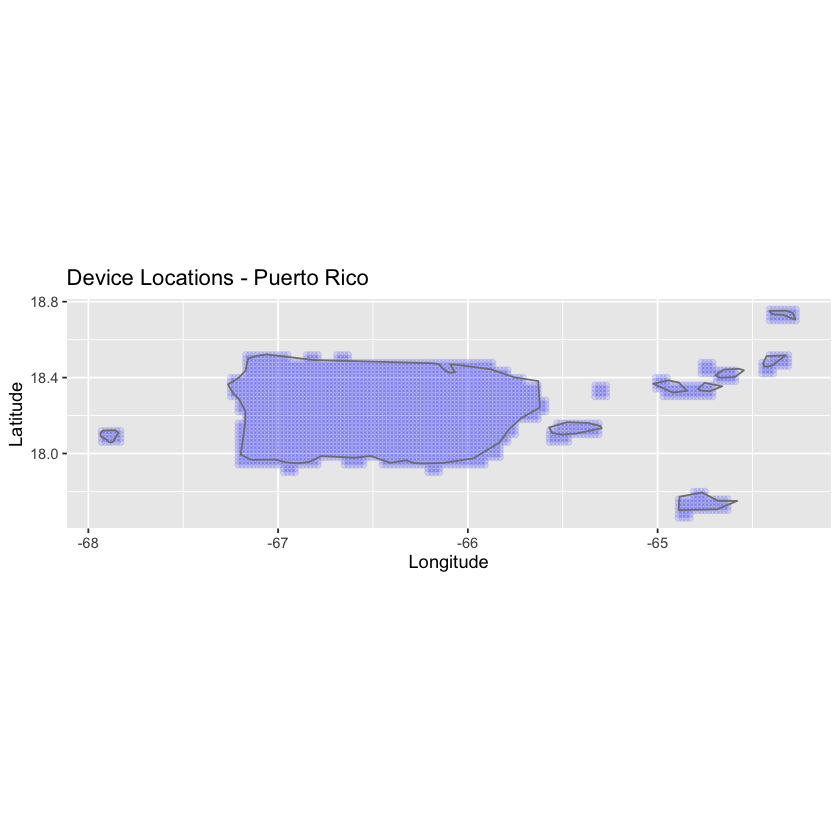

In [9]:
df_cords_subset <- df %>%
  distinct(device_id, .keep_all = TRUE)

ggplot(df_cords_subset, aes(x = lon, y = lat)) +
  geom_point(alpha = 0.1, color = "blue") +
  borders("world") +
  coord_fixed(
    xlim = c(device_stats$min_lon, device_stats$max_lon),
    ylim = c(device_stats$min_lat, device_stats$max_lat)
  ) +
  labs(
    title = "Device Locations - Puerto Rico",
    x = "Longitude",
    y = "Latitude"
  )


<br>

---

Kao što je pokazano u *data_preparation* notebook-u, postoji ukupno **2,480** mjernih uređaja (senzora).

Na grafikonu iznad prikazan je dio planete Zemlje koji je ograničen sa dvije vrijednosti za geografsku širinu i dužinu:
1. donji lijevi ugao → (min_lon, min_lat) i
2. gornji desni ugao → (max_lon, max_lat).

Na osnovu tih granica dobijena je teritorija države Portoriko.

Prema podacima sa *Wikipedije*, površina Portorika iznosi **8,868** km².
Dakle, gustina senzora iznosi: 2480/8868≈0.28


In [10]:
sunny_measurements_by_device_id <- df %>%
  group_by(device_id) %>%
  summarise(count = n())

sunny_measurements_by_device_id %>%
  summarise(
    min_count = min(count),
    max_count = max(count)
  )

min_count,max_count
<int>,<int>
52124,52159


<br>

---

- Minimalan broj mjerenja po uređaju je: 52124
- Maksimalan broj mjerenja po uređaju je: 52159

In [11]:
cols_to_summarise <- c(
  "air_temperature",
  "clearsky_dhi",
  "clearsky_dni",
  "clearsky_ghi",
  "dhi",
  "dni",
  "ghi",
  "solar_zenith_angle",
  "surface_albedo",
  "surface_pressure",
  "total_precipitable_water",
  "wind_speed",
  "sci"
)

summary_stats <- df %>%
  summarise(across(
    all_of(cols_to_summarise),
    list(
      min = ~min(.),
      q1 = ~quantile(., 0.25),
      median = ~median(.),
      mean = ~mean(.),
      q3 = ~quantile(., 0.75),
      max = ~max(.)
    ),
    .names = "{.col}_{.fn}"
  ))

write.csv(summary_stats, SUMMARY_STATS_PATH, row.names = FALSE)


---

<br>


<div align="center">

| column                     | min  | q1   | median | mean           | q3   | max   |
|:--------------------------:|:----:|:----:|:------:|:--------------:|:----:|:-----:|
| air_temperature            | 14   | 25   | 26     | 26.0931079189  | 28   | 33    |
| clearsky_dhi               | 0    | 0    | 0      | 56.0448759597  | 107  | 674   |
| clearsky_dni               | 0    | 0    | 0      | 332.274664400  | 749  | 1033  |
| clearsky_ghi               | 0    | 0    | 0      | 279.440473019  | 611  | 1085  |
| dhi                        | 0    | 0    | 0      | 85.0189071322  | 120  | 710   |
| dni                        | 0    | 0    | 0      | 209.828480404  | 374  | 1033  |
| ghi                        | 0    | 0    | 0      | 220.554579904  | 424  | 1085  |
| solar_zenith_angle         | 0    | 5040 | 8900   | 6984.322117791 | 8900 | 8900  |
| surface_albedo             | 48   | 139  | 154    | 146.798017523  | 164  | 193   |
| surface_pressure           | 8700 | 9900 | 10100  | 10006.2241507  | 10200| 10300 |
| total_precipitable_water   | 989  | 3241 | 3994   | 4023.64056238  | 4781 | 8946  |
| wind_speed                 | 0    | 29   | 37     | 37.7716331796  | 46   | 241   |
| sci                 | 0.013840830449827   | 0.654726368159204   | 1     | 0.804366112305999  | 1   | 1   |


<i> Tabela 2 </i>

</div>



<br>
<br>


<div align="center">
    <h3> <b> Raspodjela po pojedinačnim obilježjima </b> </h3>
</div>

---


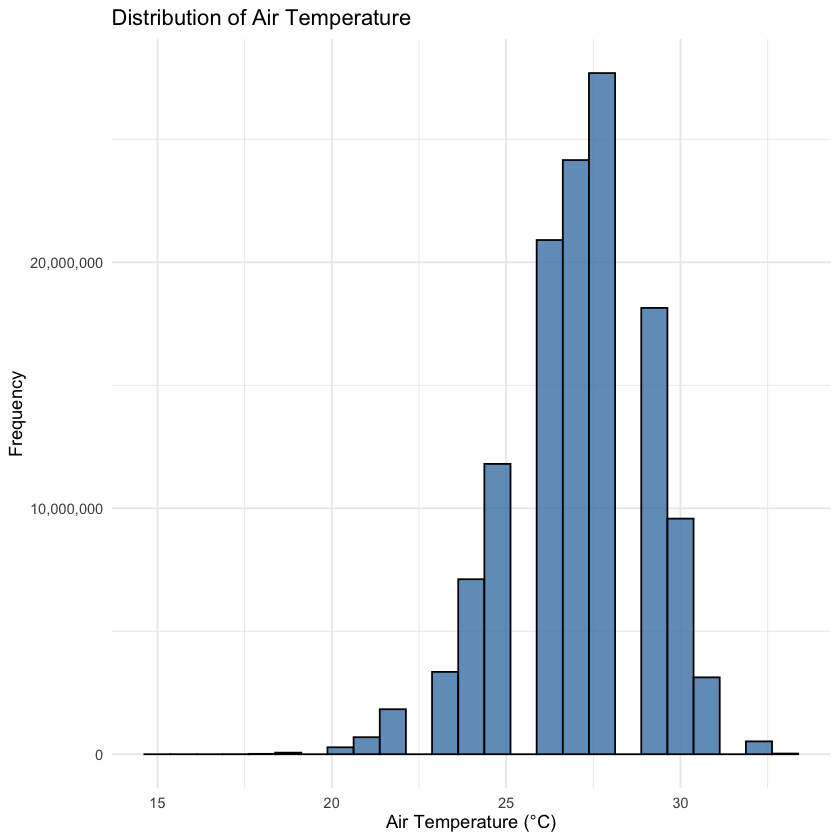

In [12]:
ggplot(df, aes(x = air_temperature)) +
  geom_histogram(fill = "steelblue", color = "black", bins = 25, alpha = 0.8) +
  theme_minimal() +
  labs(title = "Distribution of Air Temperature",
       x = "Air Temperature (°C)",
       y = "Frequency") +
  scale_y_continuous(labels = comma)


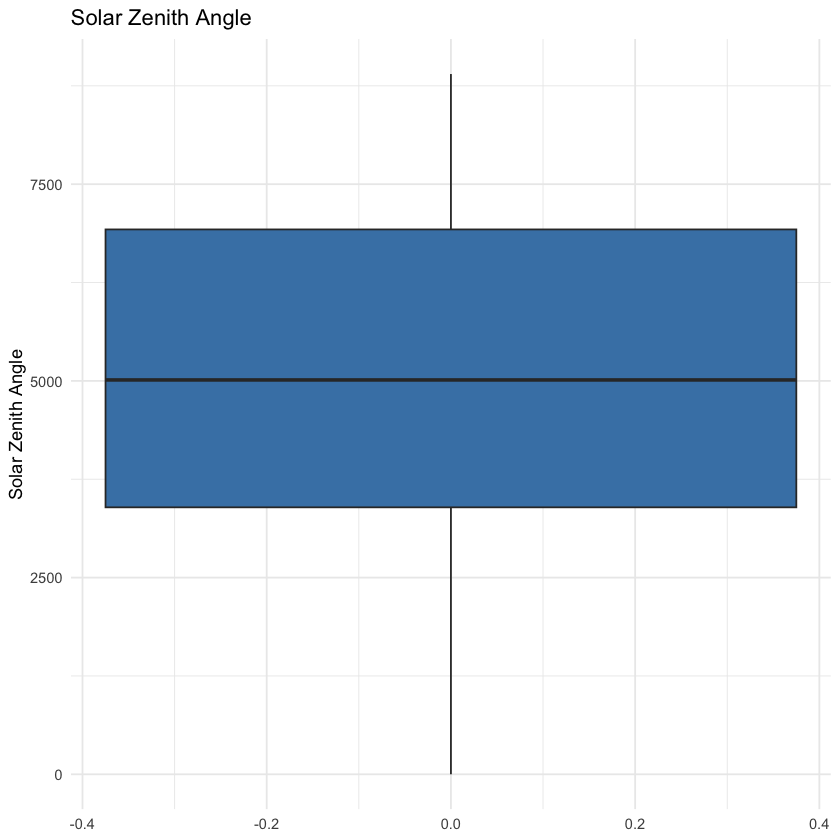

In [14]:
ggplot(df, aes(y = solar_zenith_angle)) +
  geom_boxplot(fill="steelblue") +
  labs(title="Solar Zenith Angle", y="Solar Zenith Angle") +
  theme_minimal()

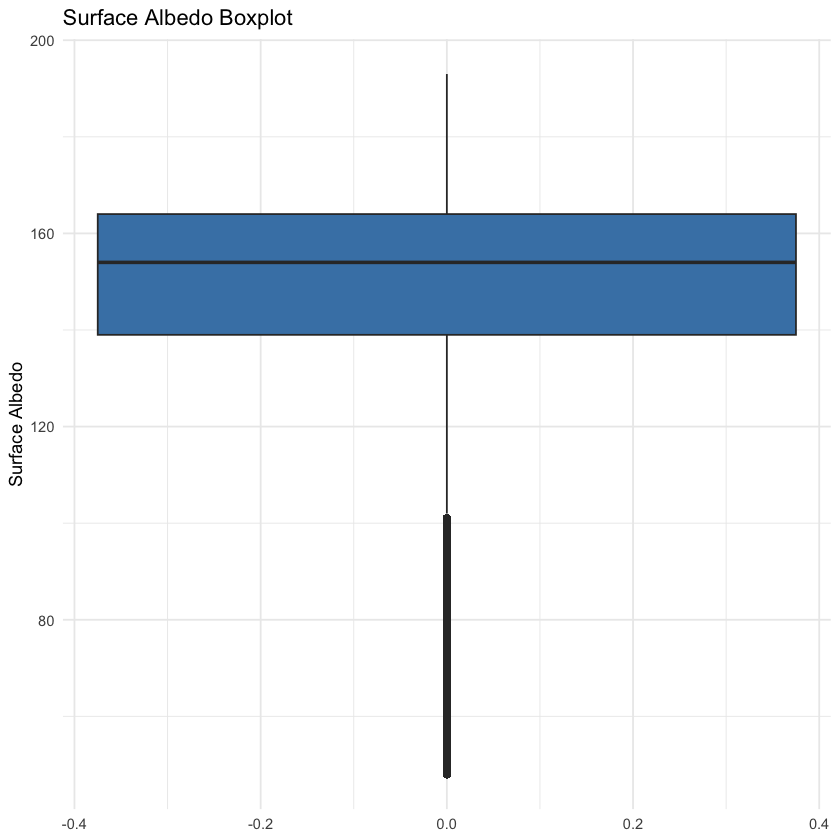

In [15]:
ggplot(df, aes(y = surface_albedo)) +
  geom_boxplot(fill="steelblue") +
  labs(title="Surface Albedo Boxplot", y="Surface Albedo") +
  theme_minimal()

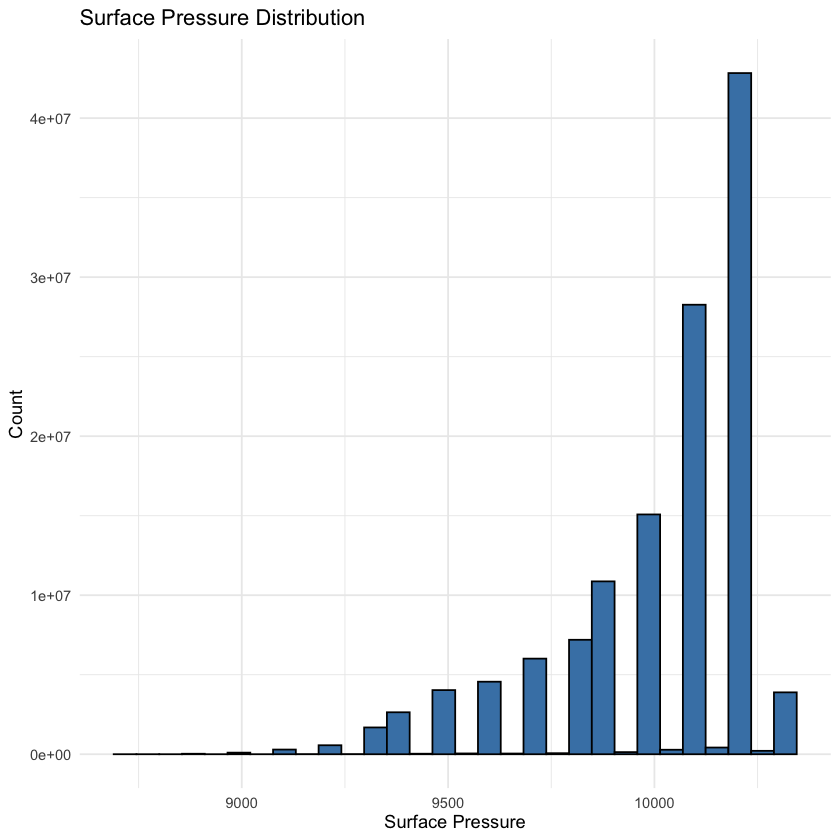

In [9]:
ggplot(df, aes(x = surface_pressure)) +
  geom_histogram(fill="steelblue", color="black", bins=30) +
  labs(title="Surface Pressure Distribution", x="Surface Pressure", y="Count") +
  theme_minimal()

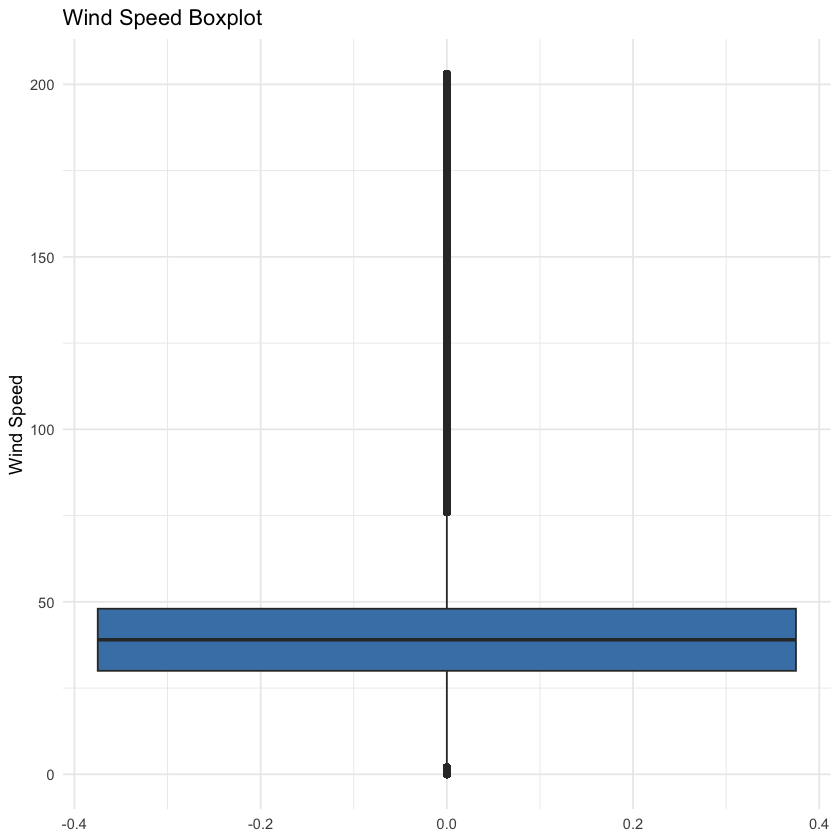

In [10]:
ggplot(df, aes(y = wind_speed)) +
  geom_boxplot(fill="steelblue") +
  labs(title="Wind Speed Boxplot", y="Wind Speed") +
  theme_minimal()

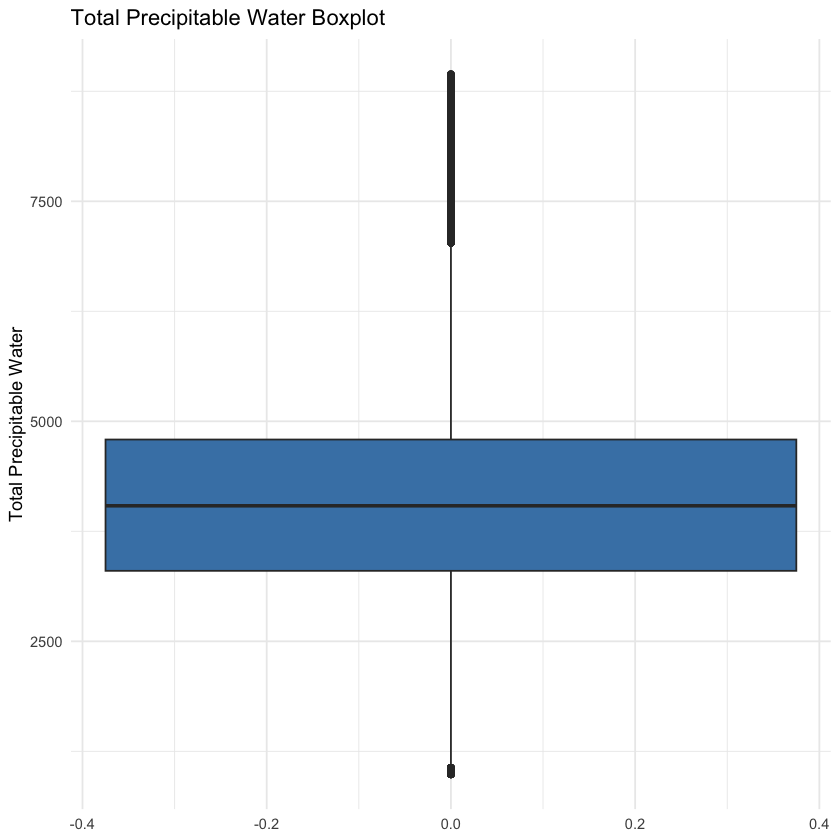

In [11]:
ggplot(df, aes(y = total_precipitable_water)) +
  geom_boxplot(fill="steelblue") +
  labs(title="Total Precipitable Water Boxplot", y="Total Precipitable Water") +
  theme_minimal()

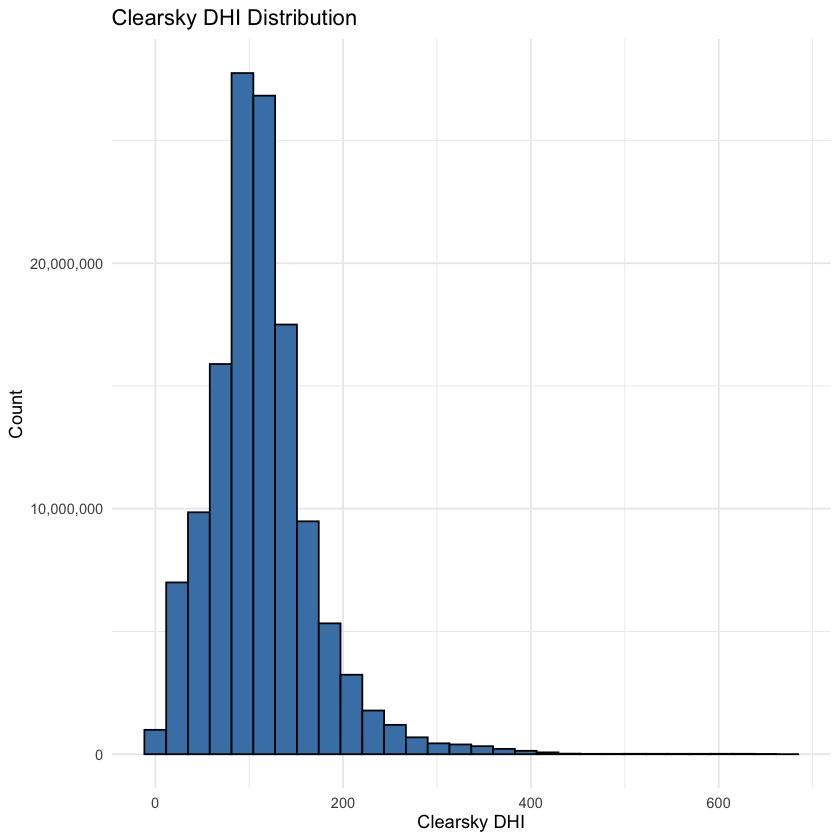

In [12]:
ggplot(df, aes(x = clearsky_dhi)) +
  geom_histogram(fill="steelblue", color="black", bins=30) +
  labs(title="Clearsky DHI Distribution", x="Clearsky DHI", y="Count") +
  theme_minimal() + 
  scale_y_continuous(labels = comma)

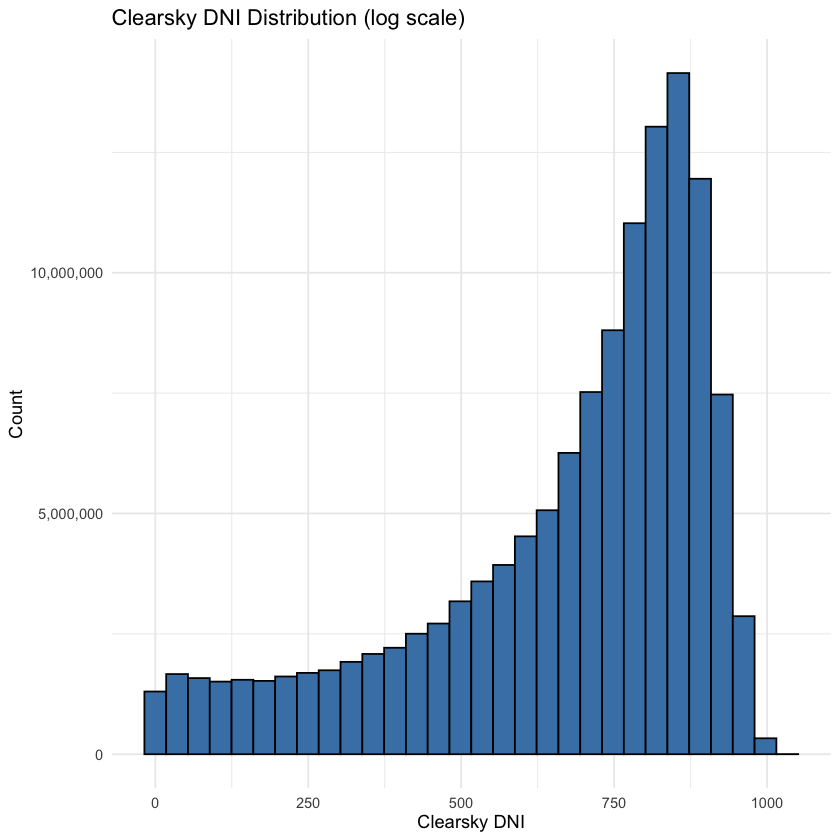

In [ ]:
ggplot(df, aes(x = clearsky_dni)) +
  geom_histogram(fill="steelblue", color="black", bins=30) +
  labs(title="Clearsky DNI Distribution", x="Clearsky DNI", y="Count") +
  theme_minimal() +
  scale_y_continuous(labels = comma)

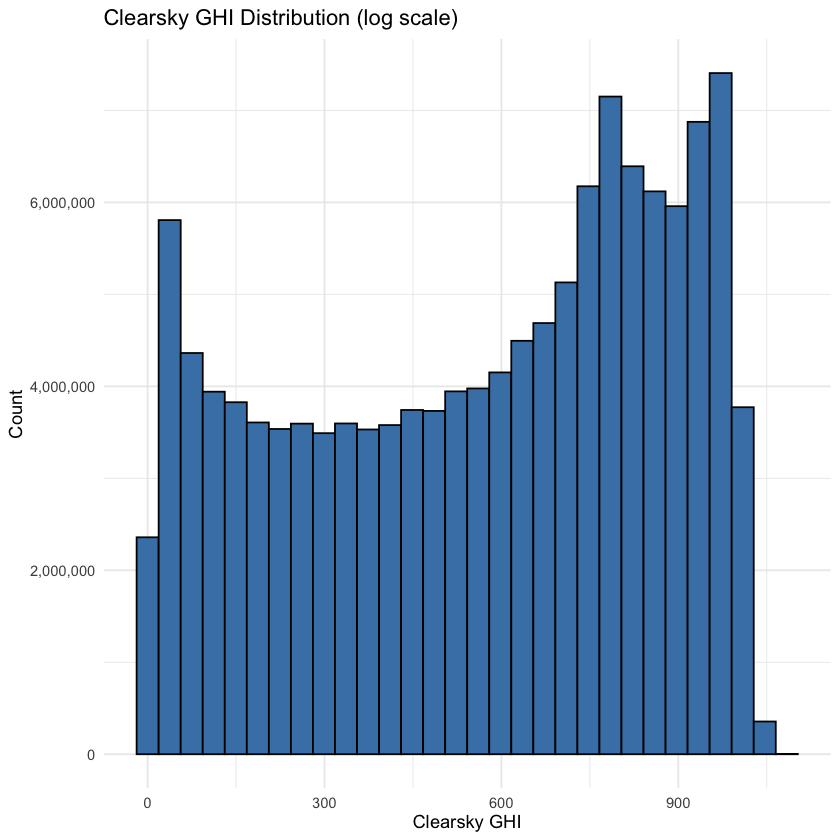

In [ ]:
ggplot(df, aes(x = clearsky_ghi)) +
  geom_histogram(fill="steelblue", color="black", bins=30) +
  labs(title="Clearsky GHI Distribution", x="Clearsky GHI", y="Count") +
  theme_minimal() +
  scale_y_continuous(labels = comma)

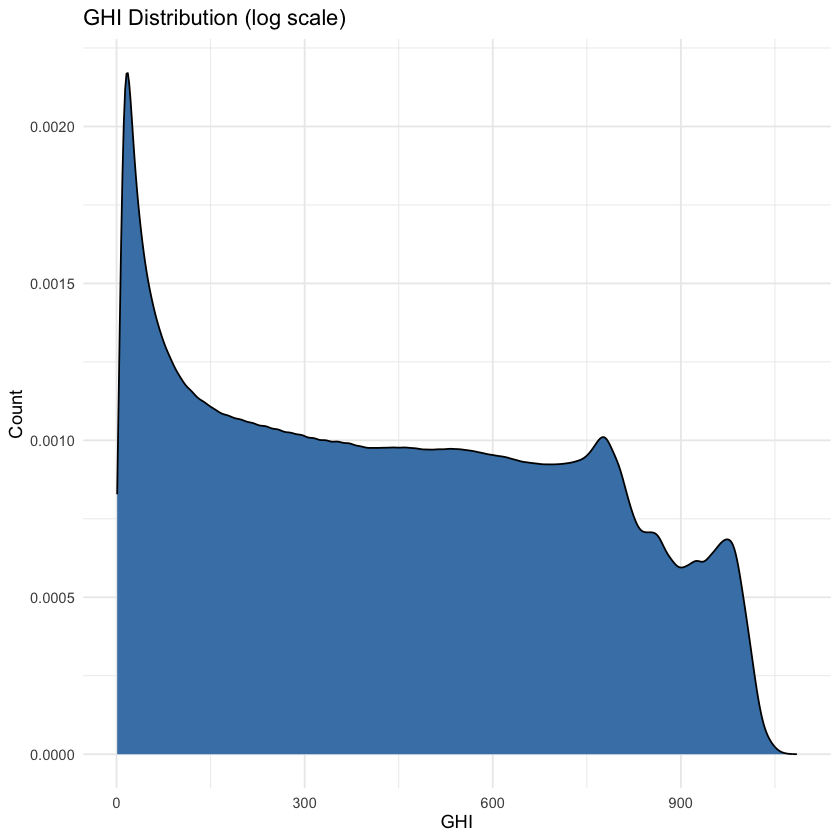

In [ ]:
ggplot(df, aes(x = ghi)) +
  geom_density(fill="steelblue") +
  labs(title="GHI Distribution", x="GHI", y="Count") +
  theme_minimal() +
  scale_y_continuous(labels = comma)

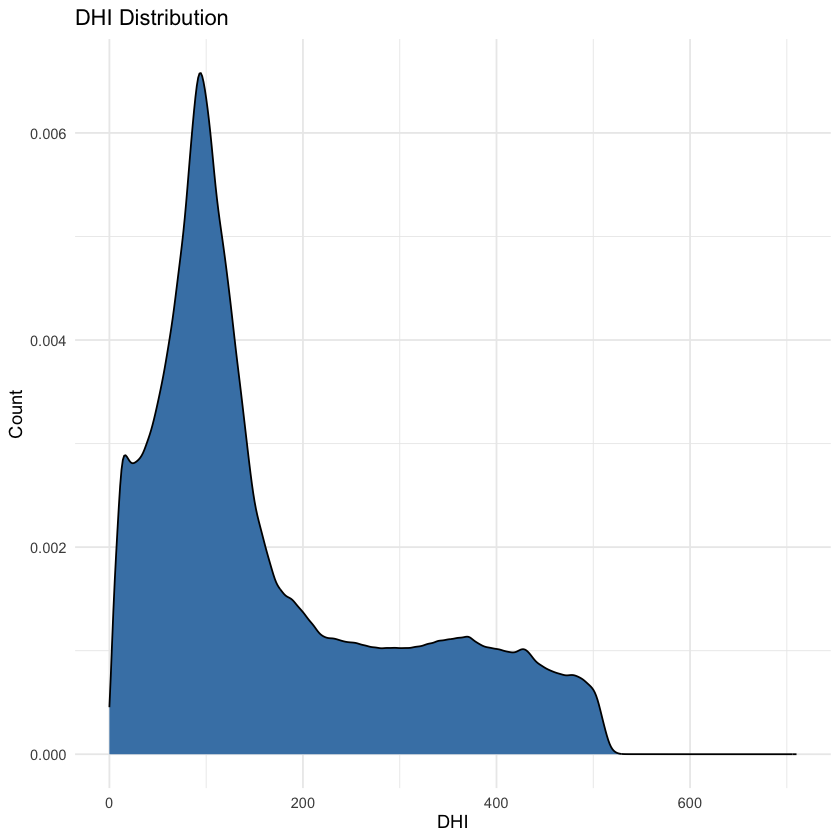

In [76]:
ggplot(df, aes(x = dhi)) +
  geom_density(fill="steelblue") +
  labs(title="DHI Distribution", x="DHI", y="Count") +
  theme_minimal() +
  scale_y_continuous(labels = comma)

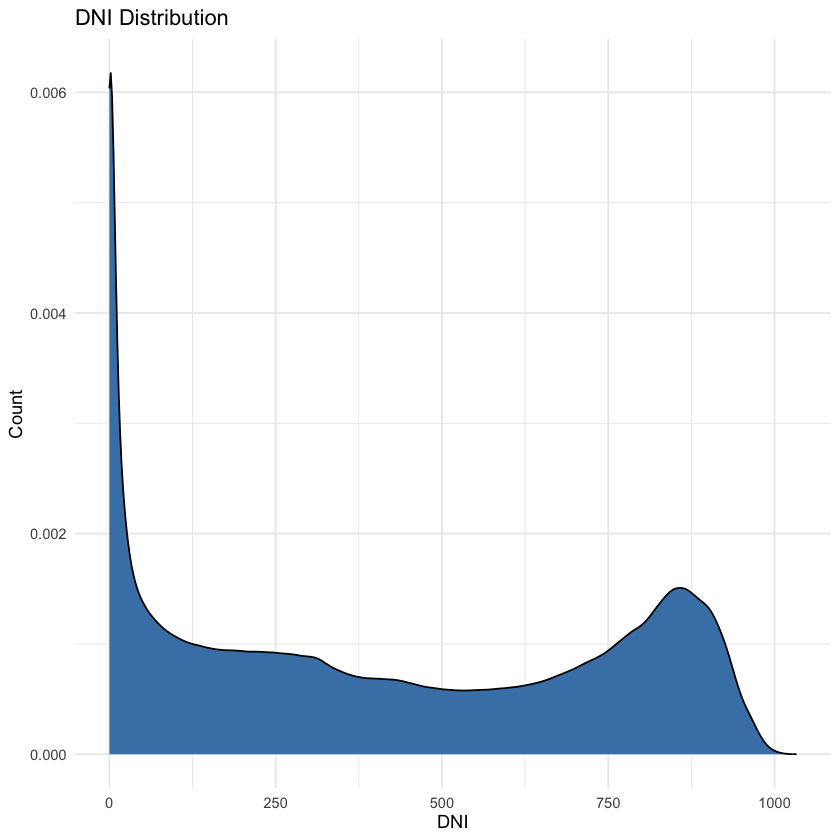

In [77]:
ggplot(df, aes(x = dni)) +
  geom_density(fill="steelblue") +
  labs(title="DNI Distribution", x="DNI", y="Count") +
  theme_minimal() +
  scale_y_continuous(labels = comma)

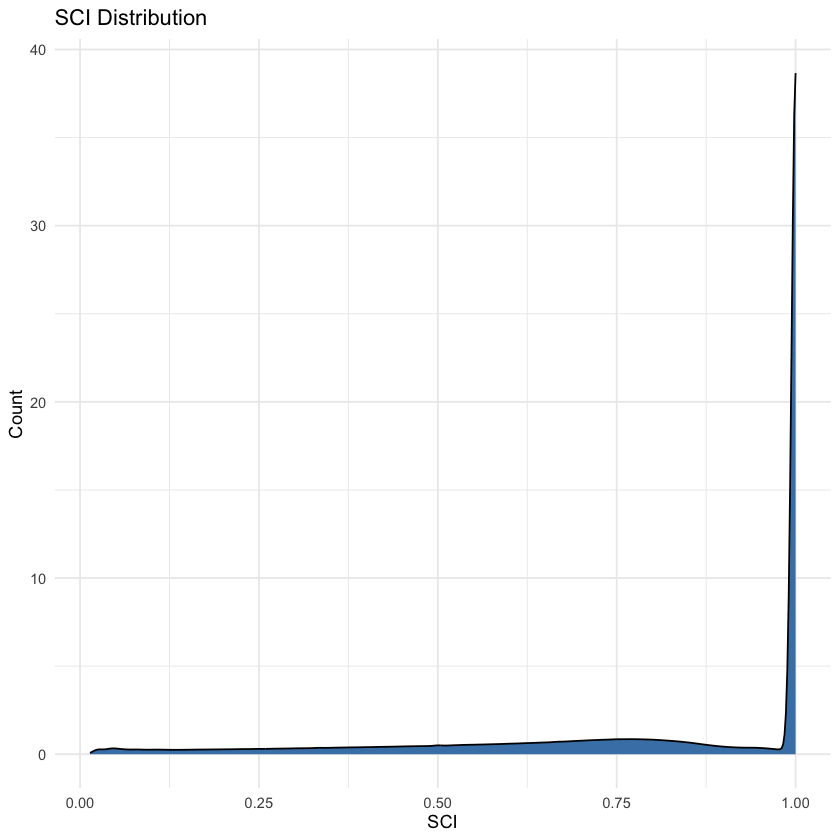

In [14]:
ggplot(df, aes(x = sci)) +
  geom_density(fill="steelblue") +
  labs(title="SCI Distribution", x="SCI", y="Count") +
  theme_minimal() +
  scale_y_continuous(labels = comma)

<br>
<br>


<div align="center">
    <h3> <b> Ispitivanje odnosa između obilježja </b> </h3>
</div>

---


In [ ]:
set.seed(123)
df_sample <- df %>% sample_frac(0.05)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


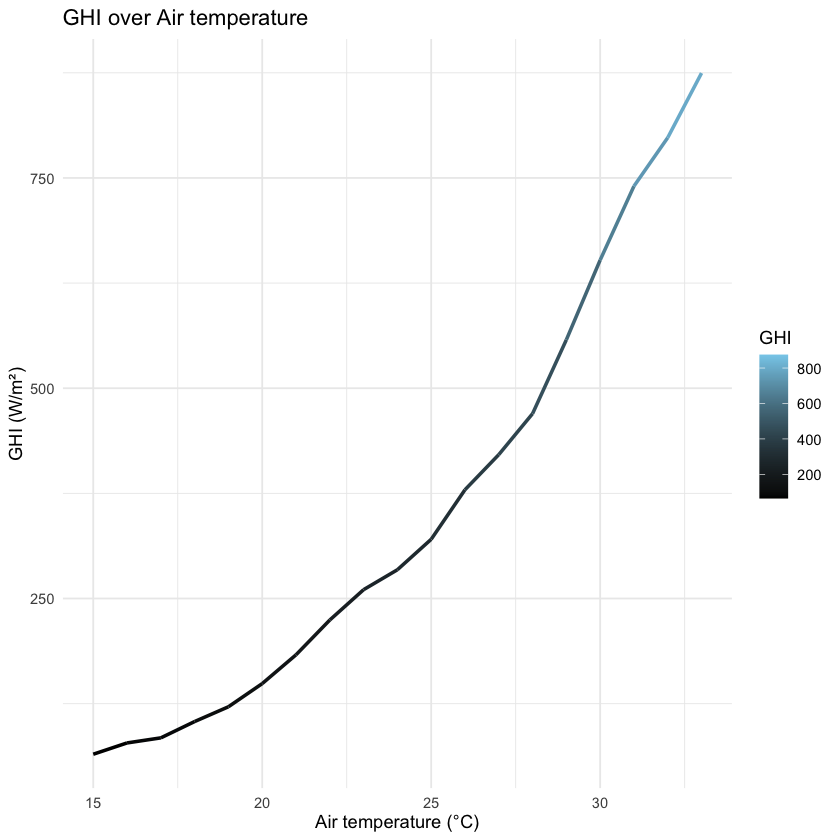

In [9]:
df_line <- aggregate(ghi ~ air_temperature, data = df, FUN = mean)

ggplot(df_line, aes(x = air_temperature, y = ghi, color = ghi)) +
  geom_line(size = 1) +
  scale_color_gradient(low = "black", high = "skyblue") +
  labs(title = "GHI over Air temperature",
       x = "Air temperature (°C)",
       y = "GHI (W/m²)",
       color = "GHI") +
  theme_minimal()


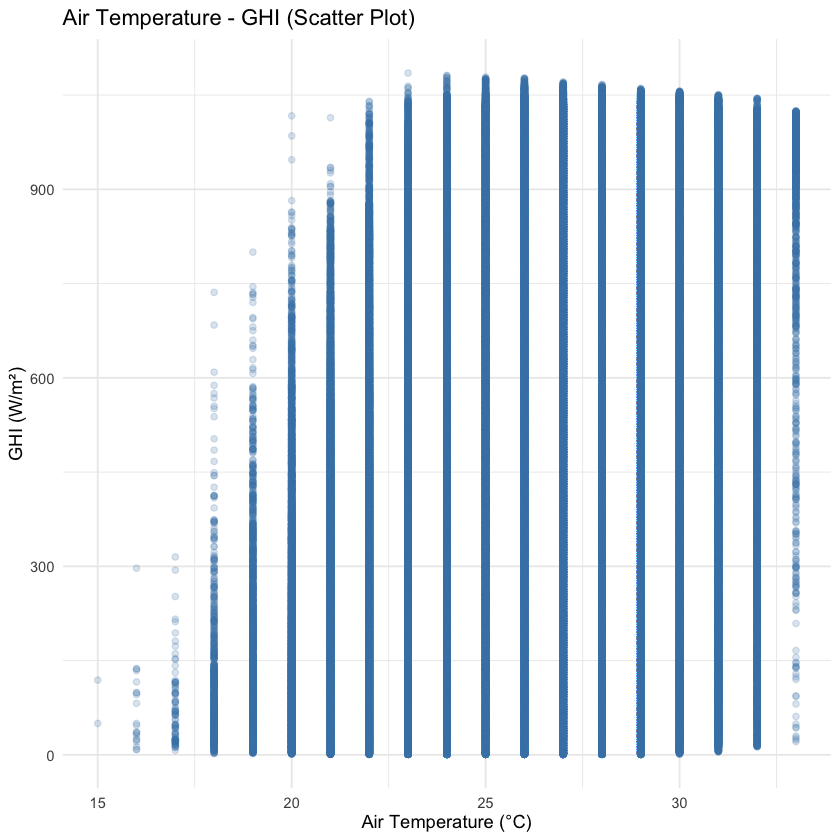

In [10]:
ggplot(df_sample, aes(x = air_temperature, y = ghi)) +
  geom_point(alpha = 0.2, color = "steelblue") +
  labs(title = "Air Temperature - GHI (Scatter Plot)",
       x = "Air Temperature (°C)",
       y = "GHI (W/m²)") +
  theme_minimal()



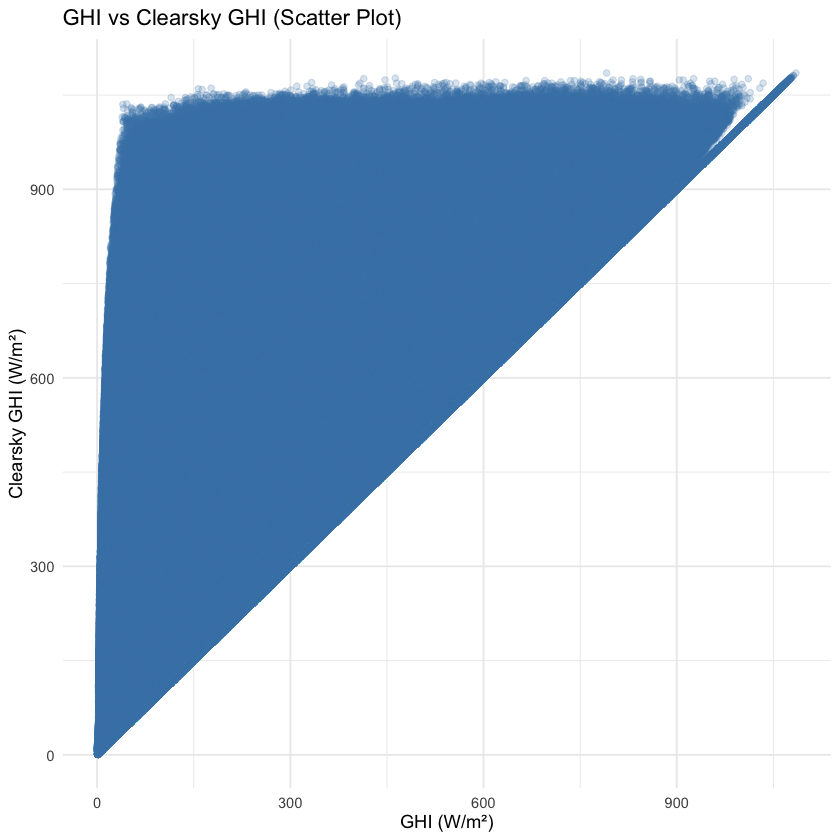

In [13]:
ggplot(df_sample, aes(x = ghi, y = clearsky_ghi)) +
  geom_point(alpha = 0.2, color = "steelblue") +
  labs(title = "GHI vs Clearsky GHI (Scatter Plot)",
       x = "GHI (W/m²)",
       y = "Clearsky GHI (W/m²)") +
  theme_minimal()



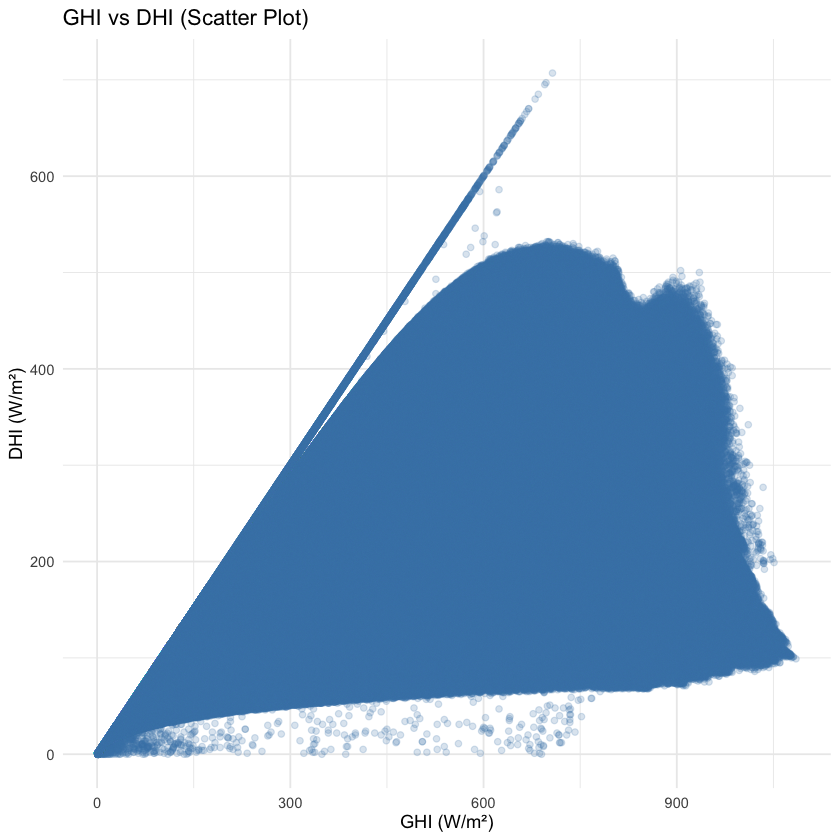

In [14]:
ggplot(df_sample, aes(x = ghi, y = dhi)) +
  geom_point(alpha = 0.2, color = "steelblue") +
  labs(title = "GHI vs DHI (Scatter Plot)",
       x = "GHI (W/m²)",
       y = "DHI (W/m²)") +
  theme_minimal()